In [7]:
import os

import numpy as np
import gym
import gym_minigrid
from gym_minigrid.minigrid import OBJECT_TO_IDX, COLOR_TO_IDX, STATE_TO_IDX
import matplotlib.pyplot as plt
os.environ["SDL_VIDEODRIVER"] = "dummy"
from IPython.display import clear_output
from PIL import Image

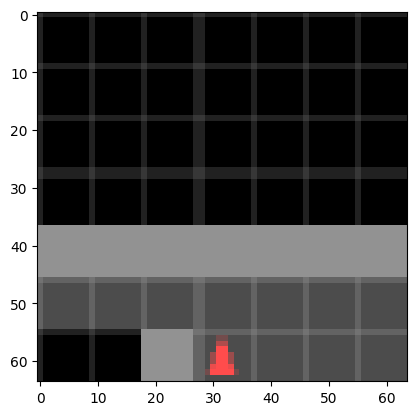

KeyboardInterrupt: 

In [11]:
env = gym.make("MiniGrid-FourRooms-v0")
env = gym_minigrid.wrappers.RGBImgPartialObsWrapper(env)
env.action_space.seed(42)

observation = env.reset()

for _ in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())
    if done:
        observation = env.reset()
        
    clear_output(wait=True)
    image = Image.fromarray(observation['image'])
    image = image.resize((64, 64), Image.NEAREST)
    image = np.array(image)
    plt.imshow(image)
    plt.show()
    # rendered_image = env.get_obs_render(observation['image'])

env.close()

In [3]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [4]:
env = gym.make("MiniGrid-FourRooms-v0")
env.action_space.seed(42)

observation = env.reset()

for _ in range(1000):
    observation, reward, done, info = env.step(env.action_space.sample())

    if done:
        observation = env.reset()
env.close()

In [5]:
def embed_mp4(filename):
  """Embeds an mp4 file in the notebook."""
  video = open(filename,'rb').read()
  b64 = base64.b64encode(video)
  tag = '''
  <video width="640" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
  Your browser does not support the video tag.
  </video>'''.format(b64.decode())

  return IPython.display.HTML(tag)


def create_policy_eval_video(policy, filename, num_episodes=5, fps=30):
  filename = filename + ".mp4"
  with imageio.get_writer(filename, fps=fps) as video:
    for _ in range(num_episodes):
      time_step = eval_env.reset()
      video.append_data(eval_py_env.render())
      while not time_step.is_last():
        action_step = policy.action(time_step)
        time_step = eval_env.step(action_step.action)
        video.append_data(eval_py_env.render())
  return embed_mp4(filename)

create_policy_eval_video(agent.policy, "trained-agent")

NameError: name 'agent' is not defined

In [ ]:
class MiniGridEnv:
    def __init__(self, obs_key='image'):
        self._env = gym.make('MiniGrid-FourRooms-v0')
        self.tile_size = 6

    def _obs(self, obs):
        obs.update(
            original_render=self.render(),
            render=self.obs_rendered(obs),
            full_render=self.full_obs_rendered(),
            full_image=self.full_obs(),
        )
        return obs
        
    def reset(self):
        return self._env.reset()
    
    def step(self, action):
        return self._env.step(action)
    
    def render(self):
        return self._env.render(mode='rgb_array')
    
    def obs_rendered(self, obs):
        return self._env.get_obs_render(obs['image'], tile_size=self.tile_size)

    def full_obs(self):
        full_grid = self._env.grid.encode()
        full_grid[self._env.agent_pos[0]][self._env.agent_pos[1]] = np.array([
            OBJECT_TO_IDX['agent'],
            COLOR_TO_IDX['red'],
            self._env.agent_dir
        ])

        return full_grid

    def full_obs_rendered(self):
        return self._env.render(
            mode='rgb_array',
            highlight=True,
            tile_size=self.tile_size
        )
        

    

Observation:  dict_keys(['image', 'direction', 'mission', 'original_render', 'render', 'full_render', 'full_image'])
Observation:  (7, 7, 3) uint8
Observation:  (42, 42, 3) uint8
Observation:  (114, 114, 3) uint8
Observation:  (19, 19, 3) uint8


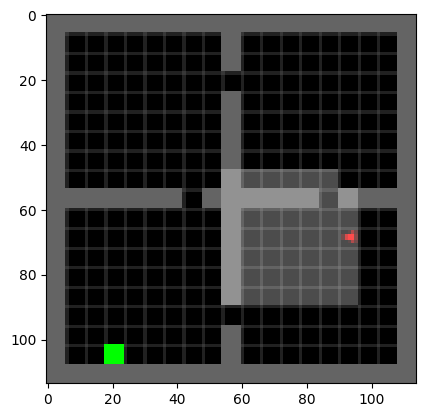

In [ ]:
env = MiniGridEnv()
env._env.seed(500)
observation = env.reset()
obs = env._obs(observation)
print("Observation: ", obs.keys())
print("Observation: ", obs['image'].shape, obs['image'].dtype)
print("Observation: ", obs['render'].shape, obs['render'].dtype)
print("Observation: ", obs['full_render'].shape, obs['full_render'].dtype)
print("Observation: ", obs['full_image'].shape, obs['full_image'].dtype)

plt.imshow(obs['full_render'])
plt.show()

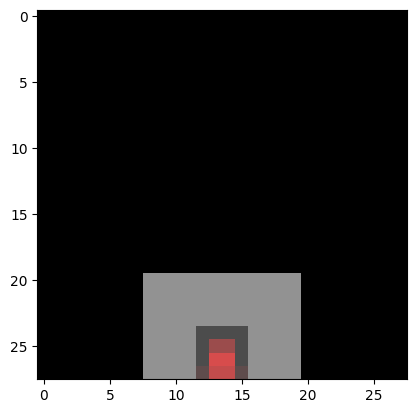

In [ ]:
done = False
env.reset()

while not done:
    action = env._env.action_space.sample()
    observation, reward, done, info = env.step(action)
    obs = env._obs(observation)
    clear_output(wait=True)
    plt.imshow(obs['render'])
    plt.show()

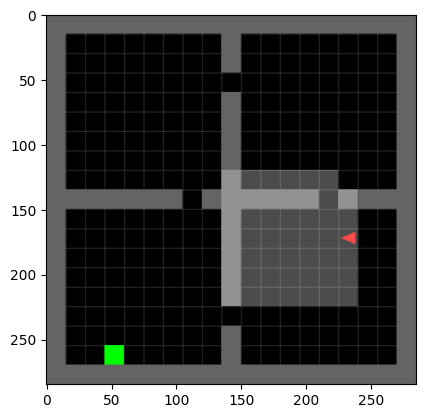

In [ ]:
plt.imshow(obs['full_render'])

In [ ]:
from gym_minigrid import minigrid
import inspect

src = inspect.getsource(minigrid)

In [ ]:
print(src)

import math
import hashlib
import gym
from enum import IntEnum
import numpy as np
from gym import error, spaces, utils
from gym.utils import seeding
from .rendering import *

# Size in pixels of a tile in the full-scale human view
TILE_PIXELS = 32

# Map of color names to RGB values
COLORS = {
    'red'   : np.array([255, 0, 0]),
    'green' : np.array([0, 255, 0]),
    'blue'  : np.array([0, 0, 255]),
    'purple': np.array([112, 39, 195]),
    'yellow': np.array([255, 255, 0]),
    'grey'  : np.array([100, 100, 100])
}

COLOR_NAMES = sorted(list(COLORS.keys()))

# Used to map colors to integers
COLOR_TO_IDX = {
    'red'   : 0,
    'green' : 1,
    'blue'  : 2,
    'purple': 3,
    'yellow': 4,
    'grey'  : 5
}

IDX_TO_COLOR = dict(zip(COLOR_TO_IDX.values(), COLOR_TO_IDX.keys()))

# Map of object type to integers
OBJECT_TO_IDX = {
    'unseen'        : 0,
    'empty'         : 1,
    'wall'          : 2,
    'floor'         : 3,
    'door'          : 4,
    'key'           : 5,
    

In [ ]:
observation['image'][:, :, 2]

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
max_pixel_values = np.array(2)
obs_norm = observation['image'] / max_pixel_values
print(observation['image'])

[[[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]]

 [[2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [2 5 0]
  [1 0 0]
  [2 5 0]]

 [[2 5 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [1 0 0]
  [0 0 0]]]


In [ ]:
from PIL import Image
print(obs['render'].shape)

(105, 105, 3)


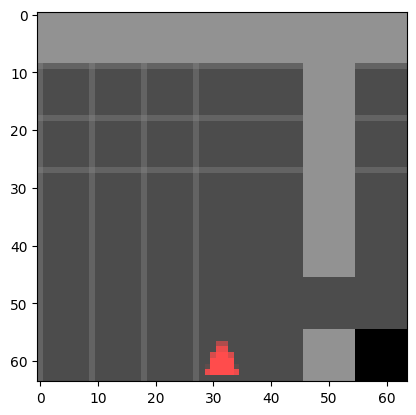

In [ ]:
image = Image.fromarray(obs['render'])
image = image.resize((64, 64), Image.NEAREST)
image = np.array(image)
plt.imshow(image)